In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)
plt.style.use('ggplot')

df = pd.read_csv('NFL Play by Play 2009-2016 (v3).csv')
#df.head()

C:\Users\spleahy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Initial Investigation

In [68]:
for col in df.columns:
    print(col)

Date
GameID
Drive
qtr
down
time
TimeUnder
TimeSecs
PlayTimeDiff
SideofField
yrdln
yrdline100
ydstogo
ydsnet
GoalToGo
FirstDown
posteam
DefensiveTeam
desc
PlayAttempted
Yards.Gained
sp
Touchdown
ExPointResult
TwoPointConv
DefTwoPoint
Safety
Onsidekick
PuntResult
PlayType
Passer
Passer_ID
PassAttempt
PassOutcome
PassLength
AirYards
YardsAfterCatch
QBHit
PassLocation
InterceptionThrown
Interceptor
Rusher
Rusher_ID
RushAttempt
RunLocation
RunGap
Receiver
Receiver_ID
Reception
ReturnResult
Returner
BlockingPlayer
Tackler1
Tackler2
FieldGoalResult
FieldGoalDistance
Fumble
RecFumbTeam
RecFumbPlayer
Sack
Challenge.Replay
ChalReplayResult
Accepted.Penalty
PenalizedTeam
PenaltyType
PenalizedPlayer
Penalty.Yards
PosTeamScore
DefTeamScore
ScoreDiff
AbsScoreDiff
HomeTeam
AwayTeam
Timeout_Indicator
Timeout_Team
posteam_timeouts_pre
HomeTimeouts_Remaining_Pre
AwayTimeouts_Remaining_Pre
HomeTimeouts_Remaining_Post
AwayTimeouts_Remaining_Post
No_Score_Prob
Opp_Field_Goal_Prob
Opp_Safety_Prob
Opp_Touchd

In [69]:
len(set(df['GameID']))

2048

In [70]:
len(df['GameID'])

362447

In [71]:
df['GameID']=df['GameID'].astype(int)

In [72]:
for col in df:
    print(col)
    print()
    print(df[col].unique())
    print('-------------------------------------------------------------')

Date

['2009-09-10' '2009-09-13' '2009-09-14' '2009-09-20' '2009-09-21'
 '2009-09-27' '2009-09-28' '2009-10-04' '2009-10-05' '2009-10-11'
 '2009-10-12' '2009-10-18' '2009-10-19' '2009-10-25' '2009-10-26'
 '2009-11-01' '2009-11-02' '2009-11-08' '2009-11-09' '2009-11-12'
 '2009-11-15' '2009-11-16' '2009-11-19' '2009-11-22' '2009-11-23'
 '2009-11-26' '2009-11-29' '2009-11-30' '2009-12-03' '2009-12-06'
 '2009-12-07' '2009-12-10' '2009-12-13' '2009-12-14' '2009-12-17'
 '2009-12-19' '2009-12-20' '2009-12-21' '2009-12-25' '2009-12-27'
 '2009-12-28' '2010-01-03' '2010-09-09' '2010-09-12' '2010-09-13'
 '2010-09-19' '2010-09-20' '2010-09-26' '2010-09-27' '2010-10-03'
 '2010-10-04' '2010-10-10' '2010-10-11' '2010-10-17' '2010-10-18'
 '2010-10-24' '2010-10-25' '2010-10-31' '2010-11-01' '2010-11-07'
 '2010-11-08' '2010-11-11' '2010-11-14' '2010-11-15' '2010-11-18'
 '2010-11-21' '2010-11-22' '2010-11-25' '2010-11-28' '2010-11-29'
 '2010-12-02' '2010-12-05' '2010-12-06' '2010-12-09' '2010-12-12'
 '20

['TEN' 'PIT' nan 'MIN' 'CLE' 'DET' 'NO' 'TB' 'DAL' 'NYJ' 'HOU' 'JAC' 'IND'
 'CIN' 'DEN' 'PHI' 'CAR' 'BAL' 'KC' 'MIA' 'ATL' 'SF' 'ARI' 'SEA' 'STL'
 'WAS' 'NYG' 'CHI' 'GB' 'BUF' 'NE' 'SD' 'OAK' 'LA' 'JAX']
-------------------------------------------------------------
desc

[ 'R.Bironas kicks 67 yards from TEN 30 to PIT 3. S.Logan to PIT 42 for 39 yards (M.Griffin).'
 '(14:53) B.Roethlisberger pass short left to H.Ward to PIT 47 for 5 yards (C.Hope).'
 '(14:16) W.Parker right end to PIT 44 for -3 yards (S.Tulloch).' ...,
 '(:22) (Shotgun) M.Stafford pass deep middle to A.Boldin for 35 yards, TOUCHDOWN.'
 "S.Martin kicks onside 11 yards from DET 35 to DET 46. R.Rodgers (didn't try to advance) to DET 46 for no gain (J.Bell)."
 '(:12) A.Rodgers kneels to DET 47 for -1 yards.']
-------------------------------------------------------------
PlayAttempted

[1]
-------------------------------------------------------------
Yards.Gained

[ 39   5  -3   0   4  -2  11   3  10  -1   9 -19  32  20   1 

[nan 'Complete' 'Incomplete Pass']
-------------------------------------------------------------
PassLength

[nan 'Short' 'Deep' '20']
-------------------------------------------------------------
AirYards

[  0  -3  34   3  -2  -1  16   1   7   5  39  20   9  17   8   4  13  24
  18  36  14  23  55   2   6  -7  12  10  31  -4  22  -6  37  32  41  29
  25  58  40  19  21  15  30 -12  11  28  35  45  33  -5  -9  26  43 -11
  48  27  57 -43  47  -8  46  52  38 -29  42  49  63  44 -17 -15 -10 -25
  50  51 -36  56  53  54 -21 -18 -32 -14 -52 -24 -13 -38  65 -37 -27 -50
 -48 -30 -47 -22 -20 -70 -16  84  60 -66  68  61  71  59 -46 -31  64 -41
  66]
-------------------------------------------------------------
YardsAfterCatch

[  0   8   1   5  11   4   9   2   3  -1  21 -11   6  -2  10  14  18  15
  -3  16  17  13  12  51  70  45  55   7  19  23  62  24  20  31  30  27
  25  29  64  37  22  40  26  -4  78  34  28  57  59  33  46  69  -9  35
  39  58  42  48  53  90  38  32  -7  -8  41  50  6

[nan 'H.Ward' 'M.Wallace' ..., 'C.Reynolds' 'D.Smelter' 'J.McKissic']
-------------------------------------------------------------
Receiver_ID

['None' '00-0017162' '00-0026901' ..., '00-0028795' '00-0032064'
 '00-0032602']
-------------------------------------------------------------
Reception

[0 1]
-------------------------------------------------------------
ReturnResult

[nan 'Fair Catch' 'Touchback' 'Touchdown']
-------------------------------------------------------------
Returner

['S.Logan' nan 'C.Finnegan' 'J.Ringer' 'A.Elam' 'P.Harvin' 'J.Cribbs'
 'D.Reynaud' 'S.Rice' 'R.Meachem' 'R.Bush' 'A.Brown' 'D.Bing' 'F.Jones'
 'C.Smith' 'P.Crayton' 'J.Jones' 'L.Washington' 'J.Leonhard' 'T.Rushing'
 'C.Simpson' 'B.Witherspoon' 'Q.Cosby' 'E.Royal' 'A.Caldwell' 'M.Goodson'
 'E.Hobbs' 'D.Jackson' 'C.Munnerlyn' 'J.Charles' 'C.Carr' 'Q.Lawrence'
 'E.Reed' 'M.Leggett' 'D.Edwards' 'B.Engram' 'A.Studebaker' 'E.Weems'
 'D.Bess' 'T.Ginn' 'P.Cobbs' 'B.Finneran' 'A.Rossum' 'A.Rolle'
 'L.Stephens

 'SF' 'CLE' 'DEN' 'CHI' 'MIA' 'IND' 'DAL' 'LA']
-------------------------------------------------------------
RecFumbPlayer

[nan 'K.Fox' 'S.Tulloch' ..., 'M.Paradis' 'A.Gotsis' 'F.Clark']
-------------------------------------------------------------
Sack

[0 1]
-------------------------------------------------------------
Challenge.Replay

[0 1]
-------------------------------------------------------------
ChalReplayResult

[nan 'Upheld' 'Reversed']
-------------------------------------------------------------
Accepted.Penalty

[0 1]
-------------------------------------------------------------
PenalizedTeam

[nan 'PIT' 'TEN' 'CLE' 'MIN' 'NO' 'DET' 'TB' 'DAL' 'HOU' 'NYJ' 'JAC' 'IND'
 'CIN' 'DEN' 'PHI' 'CAR' 'BAL' 'KC' 'MIA' 'ATL' 'SF' 'ARI' 'STL' 'SEA'
 'WAS' 'NYG' 'GB' 'CHI' 'BUF' 'NE' 'SD' 'OAK' 'LA']
-------------------------------------------------------------
PenaltyType

[nan 'Illegal Formation' 'Encroachment' 'Delay of Game' 'False Start'
 'Ineligible Downfield Kick' 'Defensive

[ 3  2  1  0 -1 -2 -3]
-------------------------------------------------------------
AwayTimeouts_Remaining_Post

[ 3  2  1  0 -1]
-------------------------------------------------------------
No_Score_Prob

[ 0.00150633  0.00096857  0.00105722 ...,  0.26251883  0.24624993
  0.77314408]
-------------------------------------------------------------
Opp_Field_Goal_Prob

[ 0.17974879  0.10850534  0.10510623 ...,  0.02106472  0.01765229
  0.08558019]
-------------------------------------------------------------
Opp_Safety_Prob

[  6.63910838e-03   1.06070551e-03   9.80799653e-04 ...,   8.91840008e-05
   7.54252477e-05   4.95500974e-03]
-------------------------------------------------------------
Opp_Touchdown_Prob

[ 0.28113771  0.1691167   0.16274677 ...,  0.01552767  0.0134632
  0.05750058]
-------------------------------------------------------------
Field_Goal_Prob

[ 0.21370014  0.29369979  0.30480453 ...,  0.42620946  0.50887484
  0.03025422]
----------------------------------------

Tie Games: 2014101202, 2012111110, 2013112403, 2016102312, 2016103000

In [73]:
df_cleaned = df.drop(columns=['desc','yrdln','PlayTimeDiff','time','Date','SideofField',
                              'PlayAttempted','DefTwoPoint','Passer','Passer_ID','PassLength','PassLocation','Interceptor',
                              'Rusher','Rusher_ID','RunLocation','RunGap','Receiver','Receiver_ID','Returner',
                              'BlockingPlayer','Tackler1','Tackler2','RecFumbTeam','RecFumbPlayer','PenalizedTeam',
                              'PenaltyType','PenalizedPlayer','Timeout_Team','PassAttempt',
                              'PassOutcome','AirYards','YardsAfterCatch','QBHit','RushAttempt','Reception','Fumble','Sack',
                             'Challenge.Replay','ChalReplayResult','Accepted.Penalty','Timeout_Indicator',
                             'posteam_timeouts_pre', 'yacWPA', 'airWPA', 'airEPA', 'yacEPA'])

In [74]:
for col in df_cleaned:
    print(col)
    print()
    print(df[col].unique())
    print('-------------------------------------------------------------')

GameID

[2009091000 2009091304 2009091307 ..., 2017010115 2017010100 2017010102]
-------------------------------------------------------------
Drive

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35]
-------------------------------------------------------------
qtr

[1 2 3 4 5]
-------------------------------------------------------------
down

[ nan   1.   2.   3.   4.]
-------------------------------------------------------------
TimeUnder

[15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]
-------------------------------------------------------------
TimeSecs

[ 3600.  3593.  3556. ...,  -741.  -401.  -672.]
-------------------------------------------------------------
yrdline100

[ 30.  58.  53.  56.  98.  94.  96.  43.  40.  31.  22.  41.  89.  42.  19.
  73.  72.  70.  79.  74.  64.  69.  60.  57.  49.  44.  77.  76.  32.  34.
  95.  87.  75.  85.  67.  66.  62.  61.  17.  12.  13.  21.  63.  37.   2.
  71.  29.  14.  68.  

[ 0.28113771  0.1691167   0.16274677 ...,  0.01552767  0.0134632
  0.05750058]
-------------------------------------------------------------
Field_Goal_Prob

[ 0.21370014  0.29369979  0.30480453 ...,  0.42620946  0.50887484
  0.03025422]
-------------------------------------------------------------
Safety_Prob

[ 0.00359231  0.00363751  0.00382603 ...,  0.00072636  0.00073191
  0.00056764]
-------------------------------------------------------------
Touchdown_Prob

[ 0.31367562  0.42301139  0.42147842 ...,  0.27386378  0.2129524
  0.04799828]
-------------------------------------------------------------
ExPoint_Prob

[ 0.          0.9907954   0.99312827  0.95170715  0.9707554   0.95941093
  0.907225    0.93111495  0.72239806  0.85985489  0.79170151]
-------------------------------------------------------------
TwoPoint_Prob

[ 0.      0.4735]
-------------------------------------------------------------
ExpPts

[ 0.32352585  2.33799976  2.41590692 ...,  3.0250614   2.871405   -0.24126

## Appending Game Results to each Row

In [75]:
df_result = df_cleaned.loc[:,['GameID','posteam','DefensiveTeam','PlayType','PosTeamScore','DefTeamScore',
                           'ScoreDiff','HomeTeam', 'AwayTeam']]
#df_result[df_result['PlayType']=='End of Game'].head(10)

In [76]:
df_result.PlayType.value_counts()

Pass                  141866
Run                   107448
Kickoff                20846
Punt                   19557
No Play                18996
Timeout                14393
Sack                    9448
Extra Point             9008
Field Goal              7902
Quarter End             4217
Two Minute Warning      3257
QB Kneel                3133
End of Game             1759
Spike                    584
Half End                  33
Name: PlayType, dtype: int64

In [77]:
winning_teams=[]
losing_teams=[]
tying_teams =[]
for index,row in df_result.iterrows():
    if row['PlayType'] =='End of Game' and row['ScoreDiff']>0:
        winning_teams.append((row['GameID'],row['posteam']))
        losing_teams.append((row['GameID'],row['DefensiveTeam']))
    elif row['PlayType'] =='End of Game' and row['ScoreDiff']<0:
        winning_teams.append((row['GameID'],row['DefensiveTeam']))
        losing_teams.append((row['GameID'],row['posteam']))
    else:
        tying_teams.append((row['GameID'],row['HomeTeam']))

In [78]:
print(len(set(winning_teams)))
print(len(set(losing_teams)))

1694
1694


In [79]:
#df_cleaned['result'] = np.NaN
winning_teams = dict(winning_teams)
losing_teams = dict(losing_teams)
tying_teams = dict(tying_teams)

In [80]:
result_list = []
for index, row in df_result.iterrows():
    if (row['GameID'] in winning_teams.keys()):
        if (row['posteam']==winning_teams[row['GameID']]):
            result_list.append('W')
    if (row['GameID'] in losing_teams.keys()):
        if (row['posteam']==losing_teams[row['GameID']]):
            result_list.append('L')
    elif (row['GameID'] in tying_teams.keys()):
        if pd.notnull(row['posteam']):
            result_list.append('T')

In [81]:
#df_result['result']=result_list
df_result.shape

(362447, 9)

In [82]:
len(result_list)

340468

In [83]:
df_result.loc[(pd.notnull(df_result['posteam']))].shape

(340468, 9)

In [84]:
df_result.loc[(pd.notnull(df_result['posteam'])),'result']=result_list

In [85]:
df_cleaned.loc[(pd.notnull(df_cleaned['posteam'])),'result']=result_list

## Exploratory Analysis and Value Investigation

Text(0.5,1,'Histogram of Number of Plays Occuring with Time in Game')

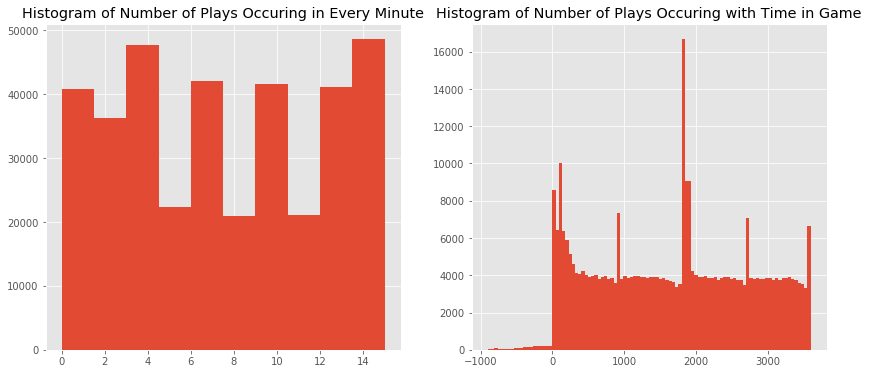

In [86]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist(df_cleaned['TimeUnder'])
plt.title('Histogram of Number of Plays Occuring in Every Minute')
plt.subplot(1,2,2)
plt.hist(df_cleaned['TimeSecs'].dropna(),bins=100)
plt.title('Histogram of Number of Plays Occuring with Time in Game')

Text(0,0.5,'Count of Plays')

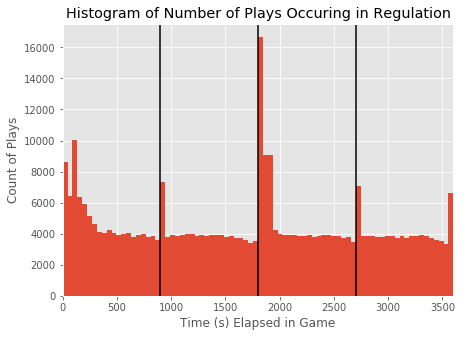

In [87]:
plt.figure(figsize=(7,5))
plt.hist(df_cleaned['TimeSecs'].dropna(),bins=100)
plt.xlim(0, 3600)
plt.axvline(x=900, color='black')
plt.axvline(x=1800, color='black')
plt.axvline(x=2700, color='black')
plt.title('Histogram of Number of Plays Occuring in Regulation')
plt.xlabel('Time (s) Elapsed in Game')
plt.ylabel('Count of Plays')

Text(0,0.5,'Count of Plays')

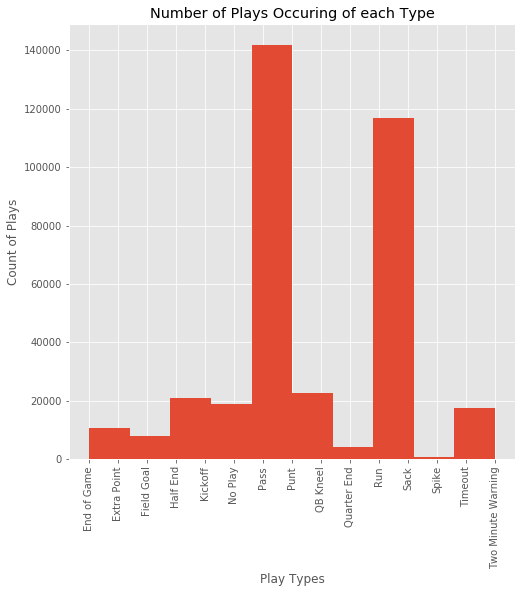

In [88]:
plt.figure(figsize=(8,8))
plt.hist(df_cleaned['PlayType'])
plt.xticks(rotation=90)
plt.title('Number of Plays Occuring of each Type')
plt.xlabel('Play Types')
plt.ylabel('Count of Plays')

Text(0,0.5,'Count of Plays')

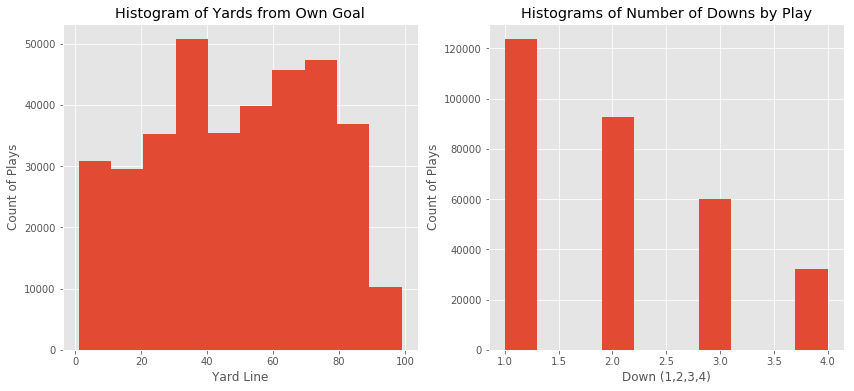

In [89]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist(df_cleaned['yrdline100'].dropna())
plt.title('Histogram of Yards from Own Goal')
plt.xlabel('Yard Line')
plt.ylabel('Count of Plays')
plt.subplot(1,2,2)
plt.hist(df_cleaned['down'].dropna())
plt.title('Histograms of Number of Downs by Play')
plt.xlabel('Down (1,2,3,4)')
plt.ylabel('Count of Plays')

Text(0,0.5,'Count of Games')

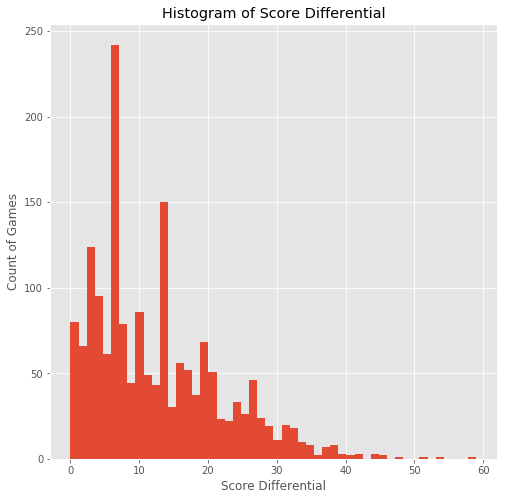

In [90]:
plt.figure(figsize=(8,8))
plt.hist(df_cleaned.loc[df_cleaned['PlayType']=='End of Game', 'ScoreDiff'].apply(abs).dropna(), bins=50)
plt.title('Histogram of Score Differential')
plt.xlabel('Score Differential')
plt.ylabel('Count of Games')

## Write Data to new CSV

In [91]:
#df_cleaned[(df_cleaned['Season'] == 2009) | (df_cleaned['Season']==2010) | (df_cleaned['Season']==2011) | (df_cleaned['Season']==2012)].to_csv('NFL_PlaybyPlay_Cleaned_2009_2012')
#df_cleaned[(df_cleaned['Season'] == 2013) | (df_cleaned['Season']==2014) | (df_cleaned['Season']==2015) | (df_cleaned['Season']==2016)].to_csv('NFL_PlaybyPlay_Cleaned_2013_2016')

df_cleaned['Season'].unique()


array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

## More Exploratory Analysis and Checking for Null Values

In [92]:
print('Total Number of plays ran: ',df_cleaned.loc[(pd.notnull(df_cleaned['posteam']))].shape[0])
print('Total Number of downed plays ran: ', df_cleaned.loc[(pd.notnull(df_cleaned['posteam'])) & 
                                                           (pd.notnull(df_cleaned['down']))].shape[0])
print('Number of Touchdowns: ', df_cleaned[df_cleaned['Touchdown']==1].shape[0])
print('Number of Safetys: ', df_cleaned[df_cleaned['Safety']==1].shape[0])
print('Number of onside kicks: ', df_cleaned[df_cleaned['Onsidekick']==1].shape[0])
print('Number of Interceptions: ', df_cleaned[df_cleaned['InterceptionThrown']==1].shape[0])
print('Number of Field Goals: ', df_cleaned[pd.notnull(df_cleaned['FieldGoalResult'])].shape[0])
print('Number of Penalties: ', df_cleaned[df_cleaned['Penalty.Yards'] != 0].shape[0])

Total Number of plays ran:  340468
Total Number of downed plays ran:  308229
Number of Touchdowns:  10571
Number of Safetys:  142
Number of onside kicks:  496
Number of Interceptions:  4065
Number of Field Goals:  8016
Number of Penalties:  25859


In [93]:
plays = ['Pass','Run','Sack','QB Kneel','Spike','Field Goal']
df_filtered = df_cleaned[(df_cleaned['PlayType'].isin(plays))]
df_filtered = df_filtered[(pd.isna(df_filtered['TwoPointConv'])) & 
                          (df_filtered['Onsidekick']==0) & 
                         ~(pd.isna(df_filtered['down'])) ]
df_filtered = df_filtered[df_filtered['TimeSecs'] > 0]
dropped_cols = ['DefensiveTeam','PuntResult','Onsidekick','ExPointResult','sp',
                'TimeUnder','TwoPointConv','ReturnResult','PosTeamScore',
                'DefTeamScore','AbsScoreDiff','No_Score_Prob','Opp_Field_Goal_Prob',
                'Opp_Safety_Prob','Opp_Field_Goal_Prob','Touchdown_Prob','ExPoint_Prob','TwoPoint_Prob','ExpPts',
                'EPA','WPA','Opp_Safety_Prob','Opp_Touchdown_Prob','Win_Prob','Home_WP_pre',
                'Away_WP_pre', 'Field_Goal_Prob', 'Safety_Prob', 'PlayType', 'Drive', 'Yards.Gained']
df_filtered = df_filtered.drop(columns=dropped_cols)

In [94]:
df_filtered.isna().any()

GameID                         False
qtr                            False
down                           False
TimeSecs                       False
yrdline100                     False
ydstogo                        False
ydsnet                         False
GoalToGo                       False
FirstDown                      False
posteam                        False
Touchdown                      False
Safety                         False
InterceptionThrown             False
FieldGoalResult                 True
FieldGoalDistance               True
Penalty.Yards                  False
ScoreDiff                      False
HomeTeam                       False
AwayTeam                       False
HomeTimeouts_Remaining_Pre     False
AwayTimeouts_Remaining_Pre     False
HomeTimeouts_Remaining_Post    False
AwayTimeouts_Remaining_Post    False
Home_WP_post                    True
Away_WP_post                    True
Season                         False
result                         False
d

In [95]:
print('Total Number of plays ran: ',df_filtered.shape[0])
print('Total Number of downed plays ran: ', df_filtered.loc[(pd.notnull(df_filtered['down']))].shape[0])
print('Number of Touchdowns: ', df_filtered[df_filtered['Touchdown']==1].shape[0])
print('Number of Safetys: ', df_filtered[df_filtered['Safety']==1].shape[0])
print('Number of Interceptions: ', df_filtered[df_filtered['InterceptionThrown']==1].shape[0])
print('Number of Penalties: ', df_filtered[df_filtered['Penalty.Yards'] != 0].shape[0])
print('Number of Field Goals: ', df_filtered[pd.notnull(df_filtered['FieldGoalResult'])].shape[0])

Total Number of plays ran:  267788
Total Number of downed plays ran:  267788
Number of Touchdowns:  10268
Number of Safetys:  112
Number of Interceptions:  3850
Number of Penalties:  3950
Number of Field Goals:  7767


In [96]:
print("Data shape: ",df_filtered.shape)
#df_filtered.head(20)

print("Play counts in sample of games: ")
print(df_filtered.GameID.value_counts()[0:10])
print()
print("Play Counts By Year: ")
print(df_filtered.Season.value_counts())

#df_filtered.head(10)

Data shape:  (267788, 27)
Play counts in sample of games: 
2011120406    198
2014111602    166
2012121613    162
2014090707    158
2015111505    158
2014110208    158
2014090705    157
2013090500    157
2014122102    157
2014090701    157
Name: GameID, dtype: int64

Play Counts By Year: 
2013    33964
2015    33663
2014    33652
2012    33541
2011    33516
2016    33479
2010    32998
2009    32975
Name: Season, dtype: int64


In [97]:
df_filtered.FieldGoalDistance = df_filtered.FieldGoalDistance.fillna(0)
df_filtered.FieldGoalResult = df_filtered.FieldGoalResult.fillna(0)

print("Checking field goal data: ")
df_filtered.FieldGoalResult.value_counts()

Checking field goal data: 


0          260021
Good         6507
No Good      1085
Blocked       175
Name: FieldGoalResult, dtype: int64

In [98]:
field_goal_df = pd.DataFrame(df_filtered.FieldGoalResult)
field_goal_df = pd.get_dummies(field_goal_df, drop_first=True)
df_filtered = df_filtered.drop(columns=['FieldGoalResult'])
df_filtered = df_filtered.join(field_goal_df)

## Splitting Training and Testing Sets

In [99]:
Train = df_filtered[df_filtered['Season'].isin([2009, 2010, 2011, 2012, 2013, 2014, 2015])]
Test = df_filtered[df_filtered['Season']==2016]
#Train.head()

## Initial Model Buidling

## Random Forest

### Version 1.

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#features = df_filtered.drop(columns=['result', 'Season'])
#outcome = df_filtered.result
#X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.25)
y_train = Train.result
X_train = Train.drop(columns=['result'])
y_test = Test.result
X_test = Test.drop(columns=['result'])
 

X_train_identifiers = X_train[['GameID', 'HomeTeam', 'AwayTeam', 'Home_WP_post', 'Away_WP_post', 'posteam', 'Season']].copy()
X_test_identifiers = X_test[['GameID', 'HomeTeam', 'AwayTeam','Home_WP_post','Away_WP_post', 'posteam', 'Season']].copy()
X_train = X_train.drop(columns=['GameID', 'HomeTeam', 'AwayTeam','Home_WP_post','Away_WP_post', 'posteam','Season'])
X_test = X_test.drop(columns=['GameID', 'HomeTeam', 'AwayTeam','Home_WP_post','Away_WP_post', 'posteam','Season'])

random_forest_classifier = RandomForestClassifier(n_estimators=200, 
                                                  criterion='entropy', 
                                                  n_jobs=-1, 
                                                  random_state=42, 
                                                  max_depth=20)

random_forest_classifier.fit(X_train, y_train)




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [101]:
feature_importances = random_forest_classifier.feature_importances_
feature_df = pd.DataFrame(feature_importances, columns=['Importance'])
feature_df['Cols'] = X_train.columns
prediction = random_forest_classifier.predict(X_test)
print('Test Accuracy Rate: ',round(accuracy_score(y_test, prediction),3))

Test Accuracy Rate:  0.628


In [102]:
probabilities = random_forest_classifier.predict_proba(X_test)

In [103]:
feature_df.sort_values(by=['Importance'], ascending=False)

,Importance,Cols
13,0.464477,ScoreDiff
2,0.137540,TimeSecs
5,0.100888,ydsnet
3,0.096252,yrdline100
4,0.054730,ydstogo
1,0.024678,down
0,0.023154,qtr
17,0.015611,AwayTimeouts_Remaining_Post
15,0.015517,AwayTimeouts_Remaining_Pre
16,0.014952,HomeTimeouts_Remaining_Post


Text(0.5,1,'Variable Importance from Random Forest Model')

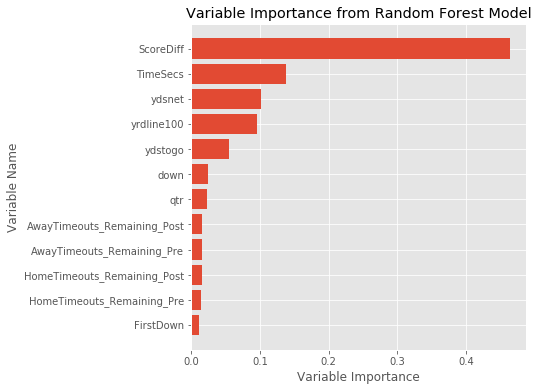

In [104]:
var_import = dict(zip(feature_df.sort_values(by=['Importance'], ascending=False).Cols, 
                      feature_df.sort_values(by=['Importance'], ascending=False).Importance))
values = list(var_import.values())[0:12]
labels = list(var_import.keys())[0:12]

plt.figure(figsize=(6,6))
plt.barh(range(12),values[::-1])
plt.yticks(range(12),labels[::-1])
plt.ylabel('Variable Name')
plt.xlabel('Variable Importance')
plt.title('Variable Importance from Random Forest Model')

In [105]:
prob_df = pd.DataFrame(probabilities[:,0], columns=['predicted_win_prob'])
game_prob_df = pd.DataFrame(X_test_identifiers)
game_prob_df['predicted_win_prob'] = prob_df.as_matrix()
game_prob_df['TimeSecs'] = X_test['TimeSecs']

game_prob_df = game_prob_df.sort_values(by=['GameID', 'TimeSecs'], ascending=False)
game_prob_df.head(10)


,GameID,HomeTeam,AwayTeam,Home_WP_post,Away_WP_post,posteam,Season,predicted_win_prob,TimeSecs
361891,2017010115,SF,SEA,0.479887,0.520113,SF,2016,0.458295,3600.0
361892,2017010115,SF,SEA,0.384394,0.615606,SF,2016,0.521373,3565.0
361893,2017010115,SF,SEA,0.395150,0.604850,SEA,2016,0.321781,3559.0
361894,2017010115,SF,SEA,0.395071,0.604929,SEA,2016,0.353137,3523.0
361895,2017010115,SF,SEA,0.432395,0.567605,SEA,2016,0.369358,3491.0
361896,2017010115,SF,SEA,0.418792,0.581208,SEA,2016,0.627326,3488.0
361898,2017010115,SF,SEA,0.479308,0.520692,SF,2016,0.396408,3483.0
361899,2017010115,SF,SEA,0.478173,0.521827,SF,2016,0.417119,3448.0
361900,2017010115,SF,SEA,0.512469,0.487531,SF,2016,0.391479,3411.0
361901,2017010115,SF,SEA,0.501739,0.498261,SF,2016,0.383295,3385.0


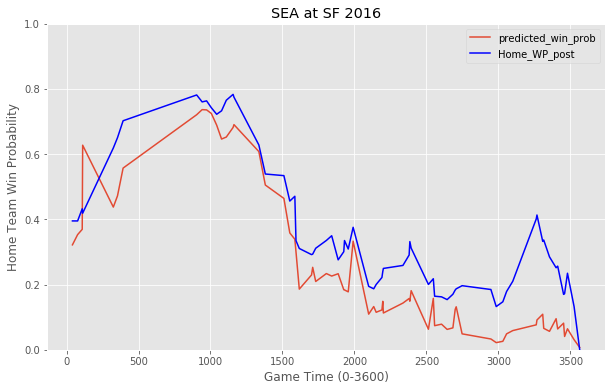

In [106]:
test_game1  = game_prob_df[(game_prob_df['GameID']== 2017010115) & (game_prob_df['posteam']=='SEA')]

plt.figure(figsize=(10,6))
plt.plot(3600-test_game1.TimeSecs, test_game1.predicted_win_prob)
plt.plot(3600-test_game1.TimeSecs, test_game1.Home_WP_post, c='b')
plt.title('SEA at SF 2016')
plt.xlabel('Game Time (0-3600)')
plt.ylim(0,1)
plt.ylabel('Home Team Win Probability')
plt.legend()

Text(0,0.5,'Home Team Win Probability')

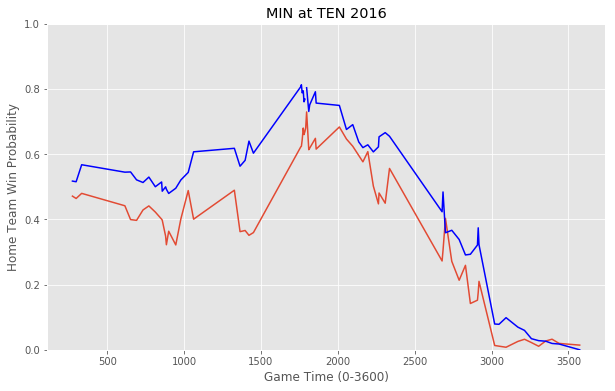

In [107]:
test_game2  = game_prob_df[(game_prob_df['GameID']== 2016091108) & (game_prob_df['posteam']=='MIN')]

plt.figure(figsize=(10,6))
plt.plot(3600-test_game2.TimeSecs, test_game2.predicted_win_prob)
plt.plot(3600-test_game2.TimeSecs, test_game2.Home_WP_post, c='b')
plt.title('MIN at TEN 2016')
plt.xlabel('Game Time (0-3600)')
plt.ylim(0,1)
plt.ylabel('Home Team Win Probability')

### Version 2. w/ grid search

In [39]:
#This will take a while to run
# from sklearn.model_selection import GridSearchCV

# rf_parameters = {'criterion':['entropy'],
#                  'max_depth':[x for x in range(10,31,4)], 
#                  'n_estimators':[x for x in range(100, 201, 50)]}

# rf_clf = GridSearchCV(RandomForestClassifier(), param_grid=rf_parameters, cv=5, n_jobs=-1)
# rf_clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['entropy'], 'max_depth': [4, 6, 8, 10, 12, 14, 16, 18, 20], 'n_estimators': [100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
rf_clf.cv_results_

C:\Users\spleahy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\spleahy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\spleahy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\spleahy\Anaconda3\lib\site-packages\sklear

{'mean_fit_time': array([  32.64509218,   53.78156428,   60.48696761,   82.85747931,
          70.41782355,  141.87592001,   88.29953103,  181.51761994,
          87.45382633,  186.8514298 ,  100.43827772,  221.92529361,
         159.60968187,  225.82849185,  194.27598948,  269.23884115,
         203.66475394,  261.24795001]),
 'mean_score_time': array([ 0.5015806 ,  0.85631015,  0.65753777,  0.92373278,  0.73106482,
         1.84956439,  0.85760741,  2.03012896,  0.99575863,  1.99351728,
         1.17482295,  1.86186926,  1.70293424,  2.45498197,  2.78329844,
         2.16017532,  2.90584195,  3.08520691]),
 'mean_test_score': array([ 0.63828095,  0.63788068,  0.64106796,  0.64079124,  0.64581676,
         0.64639492,  0.64995775,  0.65016529,  0.65323398,  0.6531895 ,
         0.65632242,  0.65669304,  0.66180257,  0.66208917,  0.66688245,
         0.66662055,  0.67247624,  0.67262943]),
 'mean_train_score': array([ 0.63857195,  0.63802124,  0.64140618,  0.64121401,  0.64696923,
    

In [41]:
rf_clf.score(X_test, y_test)

0.67571453984819729

### Version 3. PCA RF

In [236]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=10)

scaled_train = pca.fit_transform(scale(X_train))
scaled_test = pca.transform(scale(X_test))

In [239]:
#pca_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid=rf_parameters, cv=10, n_jobs=-1)
#pca_rf_clf.fit(scaled_train, y_train)

random_forest_classifier.fit(scaled_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [240]:
#rf_clf.grid_scores_
pca_prediction = random_forest_classifier.predict(scaled_test)

In [241]:
#rf_clf.score(scaled_test, y_test)
print('Test Accuracy Rate: ',round(accuracy_score(y_test, pca_prediction),3))

Test Accuracy Rate:  0.627


## Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(penalty='l1')
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
lr_prediction = LR.predict(X_test)
print('Test Accuracy Rate: ',round(accuracy_score(y_test, lr_prediction),3))

Test Accuracy Rate:  0.628


In [116]:
lr_probabilities = LR.predict_proba(X_test)
game_prob_df['lr_predicted_win_prob'] = lr_probabilities[:,0]

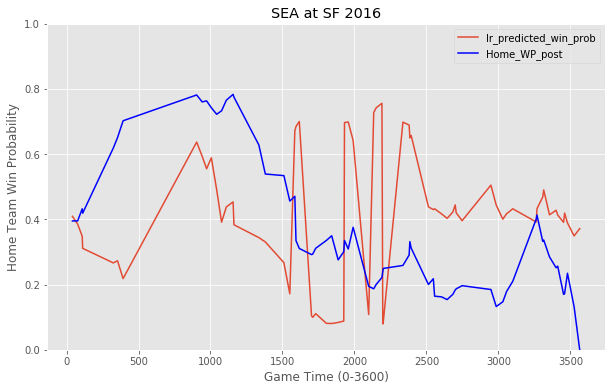

In [121]:
test_game1  = game_prob_df[(game_prob_df['GameID']== 2017010115) & (game_prob_df['posteam']=='SEA')]
plt.figure(figsize=(10,6))
plt.plot(3600-test_game1.TimeSecs, test_game1.lr_predicted_win_prob)
plt.plot(3600-test_game1.TimeSecs, test_game1.Home_WP_post, c='b')
plt.title('SEA at SF 2016')
plt.xlabel('Game Time (0-3600)')
plt.ylim(0,1)
plt.ylabel('Home Team Win Probability')
plt.legend()

### Version 2. LR with grid search